In [2]:
import pandas as pd
import numpy as np
import os

/Users/michaelbroza/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
filepath = '/Users/michaelbroza/code/michabrz/DealMatch/raw_data/preprocessed_data_1march_2.xlsx'

In [4]:
df = pd.read_excel(filepath, index_col=0)

In [5]:
df.shape

(16999, 190)

In [6]:
df.head()

,deal_id,result,investor_id,is_lost,target_revenue,target_ebitda,target_ebit,DISTRESSED_x,MAJORITY_x,MINORITY_x,...,target_Hesse,target_Lower_Saxony,target_Mecklenburg-Vorpommern,target_North_Rhine-Westphalia,target_Rhineland-Palatinate,target_Saarland,target_Saxony,target_Saxony-Anhalt,target_Schleswig-Holstein,target_Thuringia
0,3,0,1,0,-0.670000,-1.344,-1.400000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,6,0,7,0,4.745455,4.080,4.250000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,7,0,-0.209091,0.800,0.833333,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,7,1,4.954545,3.360,2.250000,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,9,1,7,1,-0.118182,0.240,0.250000,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
pd.set_option('max_columns', None)

In [8]:
df.result.value_counts()

0    13409
1     3590
Name: result, dtype: int64

In [9]:
df.result.value_counts()[1]/df.shape[0]*100

21.118889346432145

In [10]:
X = df.drop(columns=['result', 'deal_id', 'investor_id'])
y = df['result']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor

# Prepare X and y
X = df.drop(columns=['result', 'deal_id', 'investor_id'])
y = df['result']


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 6) # Holdout


baseline_model = DummyRegressor(strategy="mean") # Baseline
baseline_model.fit(X_train, y_train) # Calculate value for stratgy
baseline_model.score(X_test, y_test) # Score model based on consistently predicting the strategy

-0.000495149838693143

In [13]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# 10-Fold Cross validate model
log_cv_results = cross_validate(LogisticRegression(max_iter=1000),
                                X_train,
                                y_train,
                                cv=10,
                                scoring=['recall'])

# Mean of accuracies
recall = log_cv_results['test_recall'].mean()

recall

0.6959055118110236

In [14]:
log_cv_results

{'fit_time': array([1.92187595, 1.59776497, 1.57975888, 1.61307406, 1.50790501,
        1.78311181, 1.88793492, 1.70468497, 1.67847919, 1.69816518]),
 'score_time': array([0.0101018 , 0.00349116, 0.00401616, 0.00371695, 0.00420284,
        0.00423098, 0.00392509, 0.00689197, 0.00490975, 0.00283694]),
 'test_recall': array([0.70196078, 0.62745098, 0.7254902 , 0.68235294, 0.6627451 ,
        0.68897638, 0.71653543, 0.7007874 , 0.70866142, 0.74409449])}

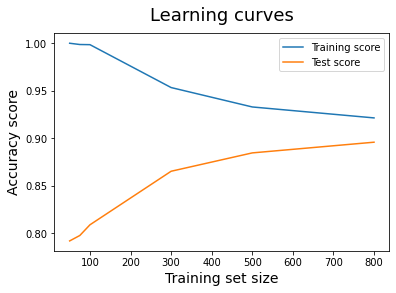

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LogisticRegression(max_iter=1000),
    X=X_train,
    y=y_train,
    train_sizes=[25, 50, 75, 100, 300, 500, 800],
    cv=20)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Test score')
plt.ylabel('Accuracy score', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves', fontsize=18, y=1.03)
#plt.xlim([0, 1000])
#plt.ylim([0, 1])
plt.legend()

In [17]:
df.head(1)

,deal_id,result,investor_id,is_lost,target_revenue,target_ebitda,target_ebit,DISTRESSED_x,MAJORITY_x,MINORITY_x,OTHER,VC,NOT_SPECIFIED,NO_CAPACITY,NO_MA_PLANNED,NO_REGION_FIT,NO_RESPONSE,NO_STRATEGIC_FIT,TOO_EXPENSIVE,TOO_SMALL,target_agriculture,target_automotive,target_biotechnology_and_life_sciences,target_chemicals,target_computer_hardware_and_equipment,target_construction,target_consumer_goods_and_apparel,target_defense,target_electronics,target_energy,target_financial_services,target_food_and_beverages,target_food_and_staples_retailing,target_health_care_equipment_and_services,target_it_services,target_industrial_automation,target_industrial_products_and_services,target_insurance,target_internet_ecommerce,target_leisure_and_consumer_services,target_manufacturing_other,target_media,target_mining,target_pharmaceuticals,target_professional_services_b2b,target_real_estate,target_retailing,target_semiconductors_and_semiconductor_equipment,target_software_and_services,target_telecommunication_hardware,target_telecommunication_services,target_transportation,target_utilities,exit_oriented_x,management_takeover_x,agnostic_x,no_fee,pays_1,pays_2,pays_3,fee_sharing_10,fee_sharing_25,keine_marge,mind_10,mind_15,mind_20,mind_5,undermanaged,CAPITAL_INCREASE,CARVE_OUT,DISTRESSED_y,GROWTH,INSOLVENCY,REAL_ESTATE,SEED,SUCCESSION,FULL,MAJORITY_y,MINORITY_y,no_stake_info,investor_agriculture,investor_automotive,investor_biotechnology_and_life_sciences,investor_chemicals,investor_computer_hardware_and_equipment,investor_construction,investor_consumer_goods_and_apparel,investor_defense,investor_electronics,investor_energy,investor_financial_services,investor_food_and_beverages,investor_food_and_staples_retailing,investor_government,investor_health_care_equipment_and_services,investor_it_services,investor_industrial_automation,investor_industrial_products_and_services,investor_insurance,investor_internet_ecommerce,investor_leisure_and_consumer_services,investor_manufacturing_other,investor_media,investor_mining,investor_pharmaceuticals,investor_professional_services_b2b,investor_real_estate,investor_retailing,investor_semiconductors_and_semiconductor_equipment,investor_software_and_services,investor_telecommunication_hardware,investor_telecommunication_services,investor_transportation,investor_utilities,investor_sector_count,investor_Australia_and_New_Zealand,investor_Eastern_Africa,investor_Eastern_Asia,investor_Eastern_Europe,investor_Northern_Africa,investor_Northern America,investor_Northern_Europe,investor_South_America,investor_South_Eastern_Asia,investor_Southern_Africa,investor_Southern_Asia,investor_Southern_Europe,investor_Western_Africa,investor_Western Asia,investor_Western_Europe,investment_Australia_and_New_Zealand,investment_Caribbean,investment_Central_America,investment_Central_Asia,investment_Eastern_Africa,investment_Eastern_Asia,investment_Eastern_Europe,investment_Latin_America_and_the_Caribbean,investment_Melanesia,investment_Micronesia,investment_Middle_Africa,investment_Northern_Africa,investment_Northern_America,investment_Northern_Europe,investment_Polynesia,investment_South_America,investment_South-eastern_Asia,investment_Southern_Africa,investment_Southern_Asia,investment_Southern_Europe,investment_Western_Africa,investment_Western_Asia,investment_Western_Europe,target_Eastern_Europe,target_Northern_Africa,target_Northern_America,target_Northern_Europe,target_Southern_Europe,target_Western_Europe,target_Austria,target_Belgium,target_Czechia,target_Egypt,target_Germany,target_Italy,target_Netherlands,target_Norway,target_Poland,target_Portugal,target_Romania,target_Slovakia,target_Spain,target_Switzerland,target_United_States_of_America,target_Baden-Württemberg,target_Bavaria,target_Berlin,target_Brandenburg,target_Bremen,target_Hamburg,target_Hesse,target_Lower_Saxony,target_Mecklenburg-Vorpommern,target_North_Rhine-Westphalia,target_Rhineland-Palatinate,target_Saarland,target_Saxony,target_Saxony-Anhalt,target_Schl

In [41]:
dict_test = df.iloc[0].to_dict()
df_test = pd.DataFrame(dict_test, index=['0',])
df_test.head()

,deal_id,result,investor_id,is_lost,target_revenue,target_ebitda,target_ebit,DISTRESSED_x,MAJORITY_x,MINORITY_x,OTHER,VC,NOT_SPECIFIED,NO_CAPACITY,NO_MA_PLANNED,NO_REGION_FIT,NO_RESPONSE,NO_STRATEGIC_FIT,TOO_EXPENSIVE,TOO_SMALL,target_agriculture,target_automotive,target_biotechnology_and_life_sciences,target_chemicals,target_computer_hardware_and_equipment,target_construction,target_consumer_goods_and_apparel,target_defense,target_electronics,target_energy,target_financial_services,target_food_and_beverages,target_food_and_staples_retailing,target_health_care_equipment_and_services,target_it_services,target_industrial_automation,target_industrial_products_and_services,target_insurance,target_internet_ecommerce,target_leisure_and_consumer_services,target_manufacturing_other,target_media,target_mining,target_pharmaceuticals,target_professional_services_b2b,target_real_estate,target_retailing,target_semiconductors_and_semiconductor_equipment,target_software_and_services,target_telecommunication_hardware,target_telecommunication_services,target_transportation,target_utilities,exit_oriented_x,management_takeover_x,agnostic_x,no_fee,pays_1,pays_2,pays_3,fee_sharing_10,fee_sharing_25,keine_marge,mind_10,mind_15,mind_20,mind_5,undermanaged,CAPITAL_INCREASE,CARVE_OUT,DISTRESSED_y,GROWTH,INSOLVENCY,REAL_ESTATE,SEED,SUCCESSION,FULL,MAJORITY_y,MINORITY_y,no_stake_info,investor_agriculture,investor_automotive,investor_biotechnology_and_life_sciences,investor_chemicals,investor_computer_hardware_and_equipment,investor_construction,investor_consumer_goods_and_apparel,investor_defense,investor_electronics,investor_energy,investor_financial_services,investor_food_and_beverages,investor_food_and_staples_retailing,investor_government,investor_health_care_equipment_and_services,investor_it_services,investor_industrial_automation,investor_industrial_products_and_services,investor_insurance,investor_internet_ecommerce,investor_leisure_and_consumer_services,investor_manufacturing_other,investor_media,investor_mining,investor_pharmaceuticals,investor_professional_services_b2b,investor_real_estate,investor_retailing,investor_semiconductors_and_semiconductor_equipment,investor_software_and_services,investor_telecommunication_hardware,investor_telecommunication_services,investor_transportation,investor_utilities,investor_sector_count,investor_Australia_and_New_Zealand,investor_Eastern_Africa,investor_Eastern_Asia,investor_Eastern_Europe,investor_Northern_Africa,investor_Northern America,investor_Northern_Europe,investor_South_America,investor_South_Eastern_Asia,investor_Southern_Africa,investor_Southern_Asia,investor_Southern_Europe,investor_Western_Africa,investor_Western Asia,investor_Western_Europe,investment_Australia_and_New_Zealand,investment_Caribbean,investment_Central_America,investment_Central_Asia,investment_Eastern_Africa,investment_Eastern_Asia,investment_Eastern_Europe,investment_Latin_America_and_the_Caribbean,investment_Melanesia,investment_Micronesia,investment_Middle_Africa,investment_Northern_Africa,investment_Northern_America,investment_Northern_Europe,investment_Polynesia,investment_South_America,investment_South-eastern_Asia,investment_Southern_Africa,investment_Southern_Asia,investment_Southern_Europe,investment_Western_Africa,investment_Western_Asia,investment_Western_Europe,target_Eastern_Europe,target_Northern_Africa,target_Northern_America,target_Northern_Europe,target_Southern_Europe,target_Western_Europe,target_Austria,target_Belgium,target_Czechia,target_Egypt,target_Germany,target_Italy,target_Netherlands,target_Norway,target_Poland,target_Portugal,target_Romania,target_Slovakia,target_Spain,target_Switzerland,target_United_States_of_America,target_Baden-Württemberg,target_Bavaria,target_Berlin,target_Brandenburg,target_Bremen,target_Hamburg,target_Hesse,target_Lower_Saxony,target_Mecklenburg-Vorpommern,target_North_Rhine-Westphalia,target_Rhineland-Palatinate,target_Saarland,target_Saxony,target_Saxony-Anhalt,target_Schl

In [57]:
test = pd.read_excel('test_to_predict.xlsx', index_col=0)

In [58]:
test.columns

Index(['deal_id', 'result', 'investor_id', 'is_lost', 'target_revenue',
       'target_ebitda', 'target_ebit', 'DISTRESSED_x', 'MAJORITY_x',
       'MINORITY_x',
       ...
       'target_Hesse', 'target_Lower_Saxony', 'target_Mecklenburg-Vorpommern',
       'target_North_Rhine-Westphalia', 'target_Rhineland-Palatinate',
       'target_Saarland', 'target_Saxony', 'target_Saxony-Anhalt',
       'target_Schleswig-Holstein', 'target_Thuringia'],
      dtype='object', length=190)

In [48]:
# Instanciate the model
log_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [61]:
test

,deal_id,result,investor_id,is_lost,target_revenue,target_ebitda,target_ebit,DISTRESSED_x,MAJORITY_x,MINORITY_x,OTHER,VC,NOT_SPECIFIED,NO_CAPACITY,NO_MA_PLANNED,NO_REGION_FIT,NO_RESPONSE,NO_STRATEGIC_FIT,TOO_EXPENSIVE,TOO_SMALL,target_agriculture,target_automotive,target_biotechnology_and_life_sciences,target_chemicals,target_computer_hardware_and_equipment,target_construction,target_consumer_goods_and_apparel,target_defense,target_electronics,target_energy,target_financial_services,target_food_and_beverages,target_food_and_staples_retailing,target_health_care_equipment_and_services,target_it_services,target_industrial_automation,target_industrial_products_and_services,target_insurance,target_internet_ecommerce,target_leisure_and_consumer_services,target_manufacturing_other,target_media,target_mining,target_pharmaceuticals,target_professional_services_b2b,target_real_estate,target_retailing,target_semiconductors_and_semiconductor_equipment,target_software_and_services,target_telecommunication_hardware,target_telecommunication_services,target_transportation,target_utilities,exit_oriented_x,management_takeover_x,agnostic_x,no_fee,pays_1,pays_2,pays_3,fee_sharing_10,fee_sharing_25,keine_marge,mind_10,mind_15,mind_20,mind_5,undermanaged,CAPITAL_INCREASE,CARVE_OUT,DISTRESSED_y,GROWTH,INSOLVENCY,REAL_ESTATE,SEED,SUCCESSION,FULL,MAJORITY_y,MINORITY_y,no_stake_info,investor_agriculture,investor_automotive,investor_biotechnology_and_life_sciences,investor_chemicals,investor_computer_hardware_and_equipment,investor_construction,investor_consumer_goods_and_apparel,investor_defense,investor_electronics,investor_energy,investor_financial_services,investor_food_and_beverages,investor_food_and_staples_retailing,investor_government,investor_health_care_equipment_and_services,investor_it_services,investor_industrial_automation,investor_industrial_products_and_services,investor_insurance,investor_internet_ecommerce,investor_leisure_and_consumer_services,investor_manufacturing_other,investor_media,investor_mining,investor_pharmaceuticals,investor_professional_services_b2b,investor_real_estate,investor_retailing,investor_semiconductors_and_semiconductor_equipment,investor_software_and_services,investor_telecommunication_hardware,investor_telecommunication_services,investor_transportation,investor_utilities,investor_sector_count,investor_Australia_and_New_Zealand,investor_Eastern_Africa,investor_Eastern_Asia,investor_Eastern_Europe,investor_Northern_Africa,investor_Northern America,investor_Northern_Europe,investor_South_America,investor_South_Eastern_Asia,investor_Southern_Africa,investor_Southern_Asia,investor_Southern_Europe,investor_Western_Africa,investor_Western Asia,investor_Western_Europe,investment_Australia_and_New_Zealand,investment_Caribbean,investment_Central_America,investment_Central_Asia,investment_Eastern_Africa,investment_Eastern_Asia,investment_Eastern_Europe,investment_Latin_America_and_the_Caribbean,investment_Melanesia,investment_Micronesia,investment_Middle_Africa,investment_Northern_Africa,investment_Northern_America,investment_Northern_Europe,investment_Polynesia,investment_South_America,investment_South-eastern_Asia,investment_Southern_Africa,investment_Southern_Asia,investment_Southern_Europe,investment_Western_Africa,investment_Western_Asia,investment_Western_Europe,target_Eastern_Europe,target_Northern_Africa,target_Northern_America,target_Northern_Europe,target_Southern_Europe,target_Western_Europe,target_Austria,target_Belgium,target_Czechia,target_Egypt,target_Germany,target_Italy,target_Netherlands,target_Norway,target_Poland,target_Portugal,target_Romania,target_Slovakia,target_Spain,target_Switzerland,target_United_States_of_America,target_Baden-Württemberg,target_Bavaria,target_Berlin,target_Brandenburg,target_Bremen,target_Hamburg,target_Hesse,target_Lower_Saxony,target_Mecklenburg-Vorpommern,target_North_Rhine-Westphalia,target_Rhineland-Palatinate,target_Saarland,target_Saxony,target_Saxony-Anhalt,target_Schl

In [63]:
probability = log_model.predict(
    test.drop(columns=['deal_id', 'result', 'investor_id']))[0]

probability

0